<a href="https://colab.research.google.com/github/OnurBahaOkumus/MedicalCostAnalysis/blob/main/MedicalCostAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bazı gerekli kütüphanelerin eklenmesi ve verilerin çekilmesi
import numpy as np
import seaborn as sb
import pandas as pd


insurance = pd.read_csv("insurance.csv")
df = insurance.copy()
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Null değer olup olmadığını kontrol ediyoruz
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Verilerin türlerini ve null bir veri olup olmadığını kontrol ediyoruz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

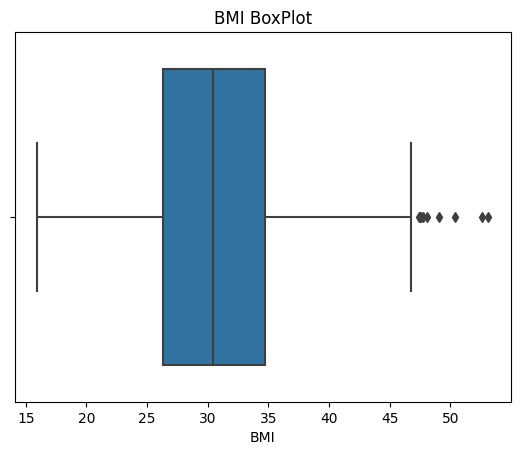

'\noutlier = df[\'bmi\'].copy()\n\nQ1 = outlier.quantile(0.25)\nQ3 = outlier.quantile(0.75)\n\nIQR = Q3 - Q1\n\nlower = Q1 - 1.5*IQR\nupper = Q3 + 1.5*IQR\n\nprint(Q1)\nprint(Q3)\nprint(f"Lower bound is: {lower} ")\nprint(f"Upper bound is: {upper}")\n\noutlier_vector = (outlier < (lower) | outlier > (upper))\noutlier_vector\n'

In [23]:
#Bu noktada BMI için data visualization ile verideki outlier(yani gereğinden  aşırı fazla veya aşırı düşük olduğu değerleri) tespit etmek için boxplot tekniğinden yararlanıyoruz.

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['bmi'])

plt.title('BMI BoxPlot')
plt.xlabel('BMI')
plt.show()





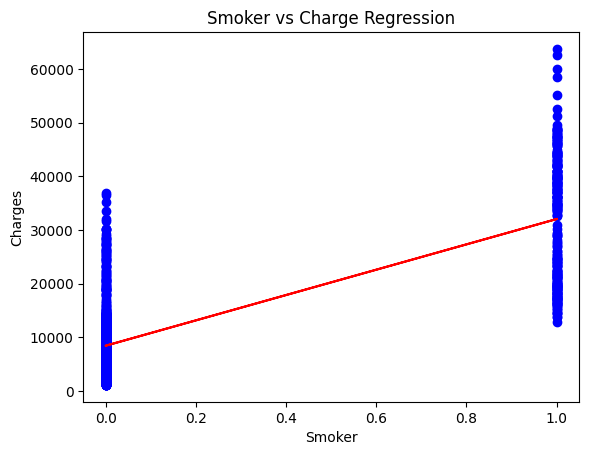

Slope (Coefficient): 23615.96353367666
Intercept : 8434.2682978562


In [ ]:
"""
'Smoker' ve 'Charges' değişkenlerini incelemek için regresyon yöntemini seçtim bu yöntemi kullanırken
bir bağımlı değişken ve bir bağımsız değişken seçmem gerekiyor. Sigara içmenin masraflar üzerindeki etkisini incelediğimden
'Charges' bağımlı ve 'smoker' bağımsız değişkne olarak aldım ve örnekteki smoker değişkeni kategorik olduğu için(yes,no) bu değişkeni
bu değişkeni regresyon modelinin kullanabilmek için 0 ve 1 şeklinde sayısallaitırmak istedim.


"""
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# kategorik değişkeni sayısallaştırma
df['smoker_'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

# bağımlı ve bağımsız değerin belirlenmesi
X = df[['smoker_']]
y = df['charges']

# linear regresyon modelinin oluşturulması
model = LinearRegression()
model.fit(X,y)

#Model Katsayıları
slope = model.coef_[0]
intercept = model.intercept_

#Regresyon doğrusunu çizmek
plt.scatter(X,y, color='blue')
plt.plot(X, slope * X + intercept, color= 'red')
plt.title('Smoker vs Charge Regression')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

#Katsayıların yazdırılması

print(f"Slope (Coefficient): {slope}")
print(f"Intercept : {intercept}")




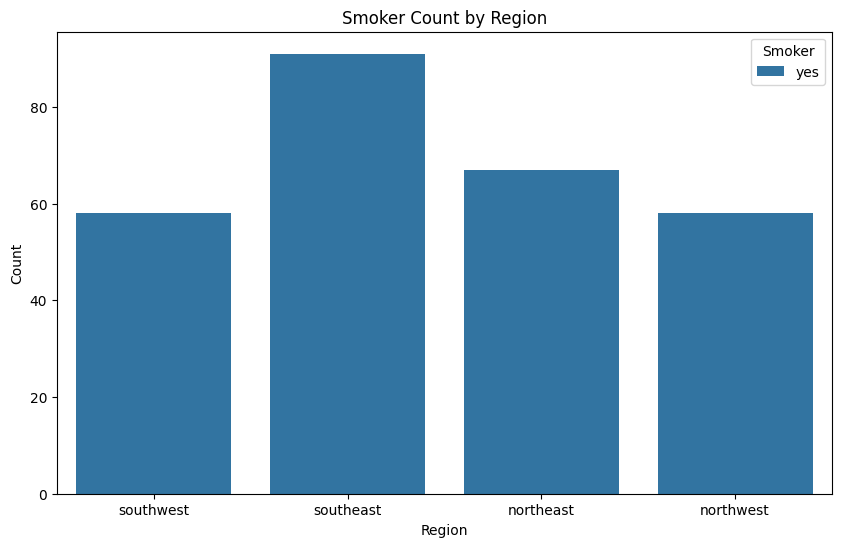

In [ ]:
"""
'Smoker' bir kategorik bir değişken ve 'region' bölge isimlerinden oluştuğu için
bölgelerdeki sigara içme oranını bir grafikle görmek bizim için bu iki değişkenin
inclenmesinde yardımcı olacaktır. Ben bu noktada
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')

#Sadece sigara içenleri görmek istediğim için bunu kategorik verisi 'yes' olanları almak istedim.
data_yes = df[df['smoker'] == 'yes']

plt.figure(figsize=(10,6))
sns.countplot(x='region', hue='smoker', data=data_yes )

plt.title('Smoker Count by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker')
plt.show()

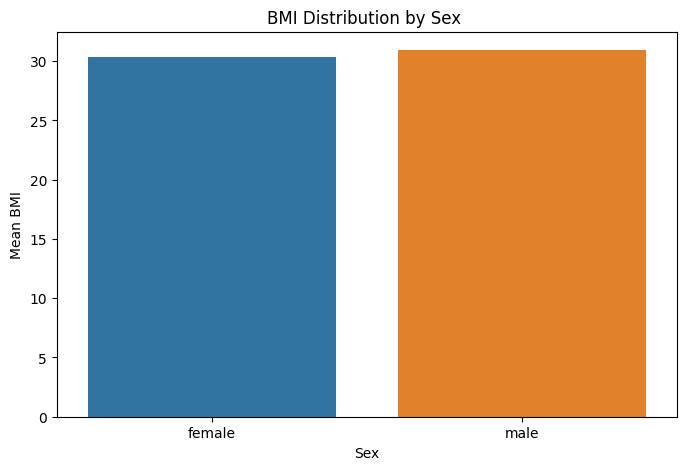

In [2]:
#

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')
f_data = df.copy()

plt.figure(figsize=(8,5))
mean_bmi_by_sex = f_data.groupby('sex')['bmi'].mean()

sns.barplot(x=mean_bmi_by_sex.index , y=mean_bmi_by_sex.values)

plt.title('BMI Distribution by Sex ')
plt.xlabel('Sex')
plt.ylabel('Mean BMI')
plt.show()


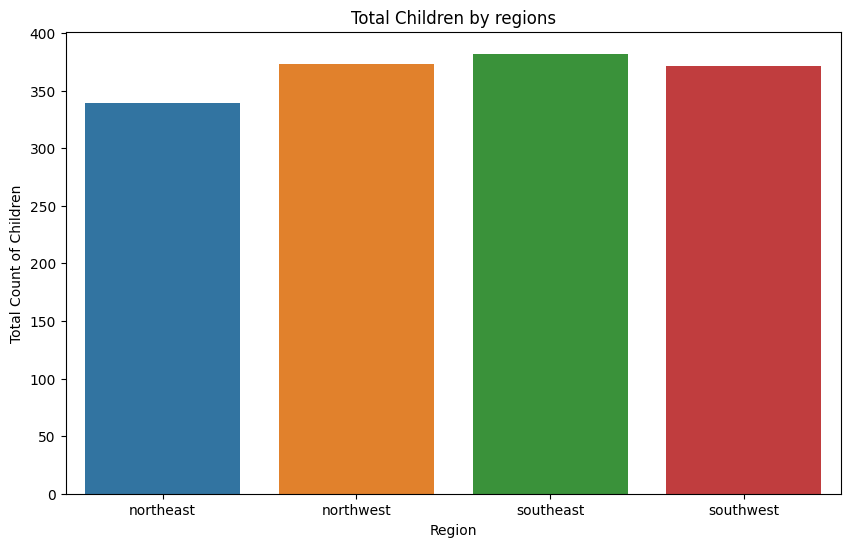

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('insurance.csv')
data = df.copy()


children_by_region = data.groupby('region')['children'].sum()

plt.figure(figsize=(10,6))
sns.barplot(x= children_by_region.index, y=children_by_region.values)

plt.title('Total Children by regions')
plt.xlabel('Region')
plt.ylabel('Total Count of Children')
plt.show()


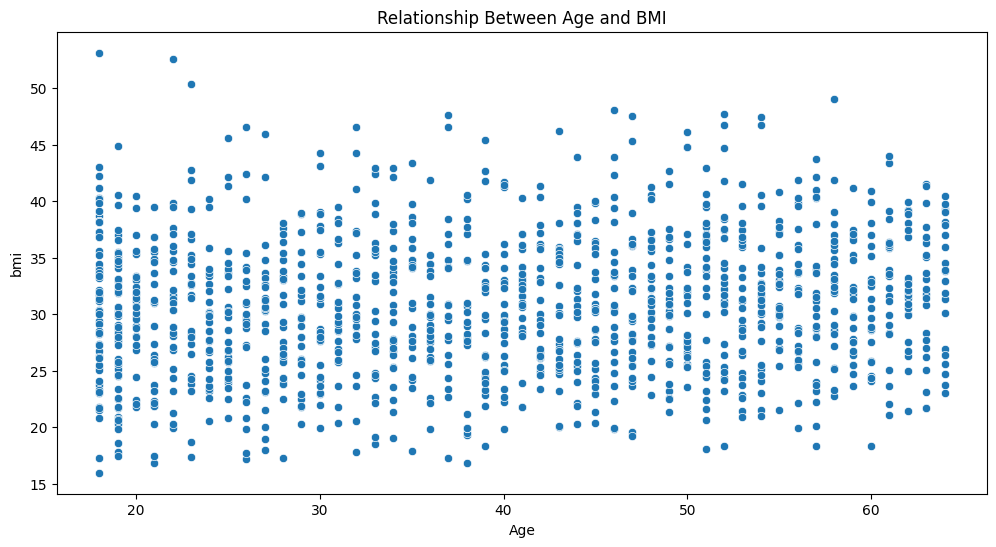

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')
data = df.copy()

plt.figure(figsize = (12,6))
sns.scatterplot(x='age', y='bmi', data = data)

plt.title('Relationship Between Age and BMI')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.show()

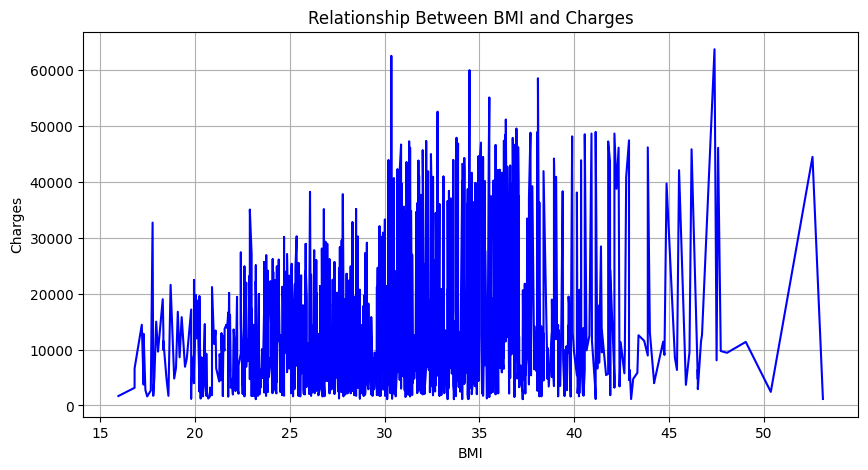

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')
data = df.copy()

data_sorted = data.sort_values(by='bmi')

plt.figure(figsize=(10,5))
plt.plot(data_sorted['bmi'], data_sorted['charges'], linestyle = '-',color = 'blue')

plt.title('Relationship Between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

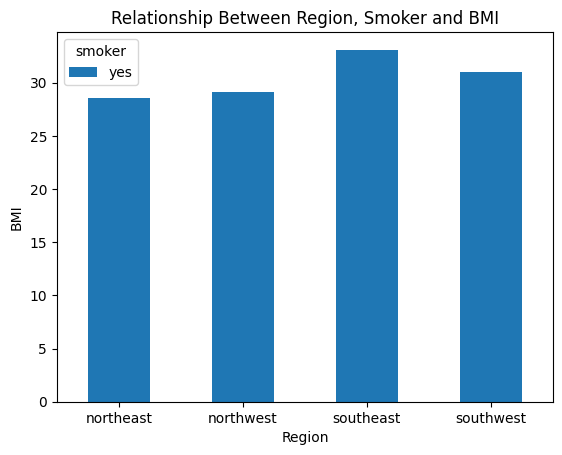

In [18]:
#Smoker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')
data = df.copy()

smoker_yes_data = data[data['smoker'] == 'yes']

group_data = smoker_yes_data.groupby(['region', 'smoker'])['bmi'].mean().reset_index()

actual_data = group_data.pivot(index = 'region', columns = 'smoker', values ='bmi')

plt.figure(figsize=(10,6))

actual_data.plot(kind='bar', stacked = True)

plt.title('Relationship Between Region, Smoker and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')

plt.xticks(rotation = 0)
plt.legend(title ='smoker')
plt.show()

In [26]:
import pandas as pd

# Veriyi 'insurance.csv' dosyasından çekiyoruz.
df = pd.read_csv('insurance.csv')
data = df.copy()

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding ile kategorik değişkenleri sayısal değişkenlere dönüştürüyoruz
label_encoder = LabelEncoder()

data['sex_labeled'] = label_encoder.fit_transform(data['sex'])
data['smoker_labeled'] = label_encoder.fit_transform(data['smoker'])
data['region_labeled'] = label_encoder.fit_transform(data['region'])

# One-Hot Encoding ile kategorik değişkenleri ikili gruplara ayırarak modeli daha iyi hale getiriyoruz.
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_columns = encoder.fit_transform(data[['sex_labeled', 'smoker_labeled', 'region_labeled']])
encoded_df = pd.DataFrame(encoded_columns)
data_encoded = pd.concat([data, encoded_df], axis=1)
data_encoded.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)

# Bağımsız değişkenleri ve bağımlı değişkeni oluşturuyoruz.
X = data_encoded.drop(['charges'], axis=1)
y = data_encoded['charges']

from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test kümelerine bölğyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Sütun adlarını string olarak çeviriyoruz ki TypeError vermesin diye
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling ile veriyi ölçeklendiriyoruz
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [52]:
#Linear Reggression = 0.735
#Rigde Reggression = 0.737
#Lasso Reggresion = 0.737
#Decision Tree = 0.699
#Random Forest = 0.834
#SVR = -0.09
#K-NN = 0.74

#verileri açıklamada en yüksek orana Random forest sahiptir. Bu yüzden model olarak random forest seçilmiştir.

from sklearn.ensemble import RandomForestRegressor


# Random Forest Regresyon modelini oluşturulması
forest_model = RandomForestRegressor(n_estimators=100)

# Modelin eğitilmesi
forest_model.fit(X_train_scaled, y_train)

# Eğitim verisi üzerinde tahmin yapılması
y_train_pred_forest = forest_model.predict(X_train_scaled)

# Test verisi üzerinde tahmin yapılması
y_test_pred_forest = forest_model.predict(X_test_scaled)





In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest Regresyon modelini oluşturun
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 5-Katlı Çapraz Doğrulama ile R^2 değerlerini hesaplayın
cv_scores_forest = cross_val_score(forest_model, X_train_scaled, y_train, cv=5, scoring='r2')

# R^2 değerlerinin ortalamasını ve standart sapmasını hesaplayın
mean_r2_forest = np.mean(cv_scores_forest)
std_r2_forest = np.std(cv_scores_forest)

print("Random Forest Regresyon - Ortalama R^2 değeri:", mean_r2_forest)
print("Random Forest Regresyon - R^2 değerlerinin standart sapması:", std_r2_forest)


Random Forest Regresyon - Ortalama R^2 değeri: 0.8349702366361781
Random Forest Regresyon - R^2 değerlerinin standart sapması: 0.018656694898341368


In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"En iyi parametreler:, {best_params}")
print(f"En iyi RMSE değeri:, {best_score}")

En iyi parametreler:, {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
En iyi RMSE değeri:, 4647.684096295906


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Eğitim verisi üzerinde tahmin yapıyoruz
y_train_pred = grid_search.best_estimator_.predict(X_train_scaled)

# Test verisi üzerinde tahmin yapıyoruz
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Hata metriklerini hesaplıyoruz (Hepsini merak ettiğim için tümünü görmek istedim.)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Eğitim RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

Eğitim RMSE: 3597.394971903209
Test RMSE: 4370.706260876489
MAE: 2402.8838465685017
R²: 0.8497263777815813
